https://towardsdatascience.com/a-step-by-step-guide-in-detecting-causal-relationships-using-bayesian-structure-learning-in-python-c20c6b31cee5

In [1]:
import bnlearn as bn
import pandas as pd

In [2]:
df = bn.import_example('sprinkler')
df.describe()

[bnlearn] >Import dataset..


,Cloudy,Sprinkler,Rain,Wet_Grass
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.512000,0.309000,0.515000,0.653000
std,0.500106,0.462312,0.500025,0.476254
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [3]:
DAG = bn.structure_learning.fit(df)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


In [4]:
print(DAG['adjmat'])

target     Cloudy  Sprinkler   Rain  Wet_Grass
source                                        
Cloudy      False      False   True      False
Sprinkler    True      False  False       True
Rain        False      False  False       True
Wet_Grass   False      False  False      False


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


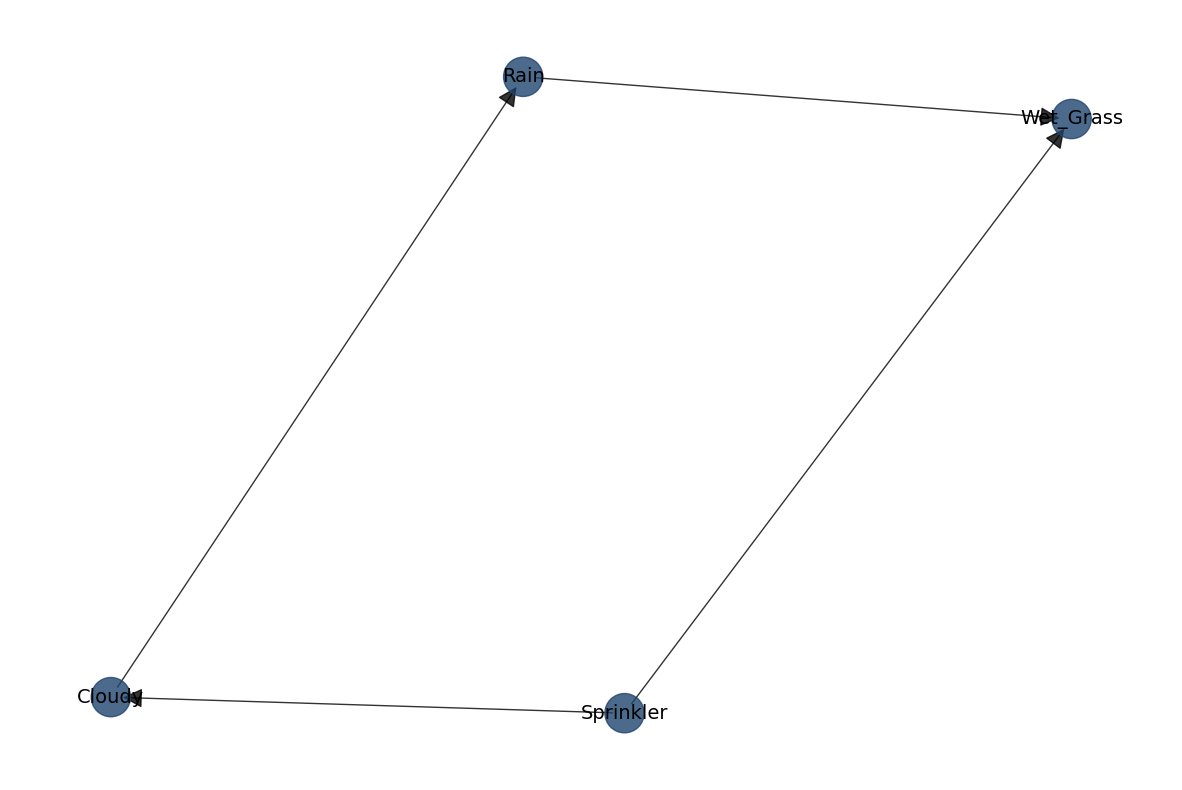

In [5]:
G = bn.plot(DAG, interactive=False)

In [6]:
# 'hc' or 'hillclimbsearch'
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
model_hc_k2   = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2')
model_hc_bdeu = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')

# 'ex' or 'exhaustivesearch'
model_ex_bic  = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')
model_ex_k2   = bn.structure_learning.fit(df, methodtype='ex', scoretype='k2')
model_ex_bdeu = bn.structure_learning.fit(df, methodtype='ex', scoretype='bdeu')

# 'cs' or 'constraintsearch'
model_cs_k2   = bn.structure_learning.fit(df, methodtype='cs', scoretype='k2')
model_cs_bdeu = bn.structure_learning.fit(df, methodtype='cs', scoretype='bdeu')
model_cs_bic  = bn.structure_learning.fit(df, methodtype='cs', scoretype='bic')

# 'cl' or 'chow-liu' (requires setting root_node parameter)
model_cl      = bn.structure_learning.fit(df, methodtype='cl', root_node='Wet_Grass')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Computing best DAG using [cs]


Working for n conditional variables: 3:  60%|██████    | 3/5 [00:00<00:00, 10.16it/s]


[bnlearn] >Computing best DAG using [cs]


Working for n conditional variables: 3:  60%|██████    | 3/5 [00:00<00:00, 10.59it/s]


[bnlearn] >Computing best DAG using [cs]


Working for n conditional variables: 3:  60%|██████    | 3/5 [00:00<00:00, 12.92it/s]


[bnlearn] >Computing best DAG using [chow-liu]


Building tree: 100%|██████████| 6/6.0 [00:00<00:00, 2517.34it/s]
